## Credit Card Fraud Prediction 

### Project Introduction

#### About the dataset

In [18]:
# Importing  the libraries 
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use(['ggplot'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("done")

done


In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data=pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## we want a bigger data set, so we will inflate this data set by ten times 

replicas_ = 10 

big_df = pd.DataFrame(np.repeat(raw_data.values, replicas_, axis=0), columns=raw_data.columns)
print("There are now " +  str(len(big_df)) + " Observations in this datasets")
print("There are now " +  str(len(big_df.columns)) + " variables in this datasets")

There are now 2848070 Observations in this datasets
There are now 31 variables in this datasets


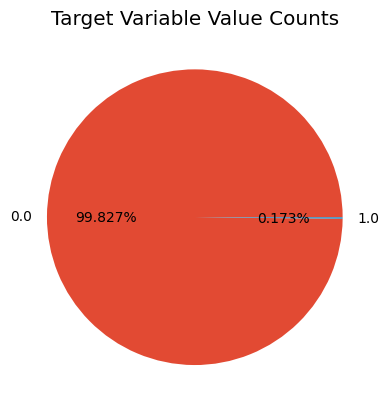

In [4]:
# get the set of distinct classes
labels = big_df.Class.unique()

# get the count of each class
sizes = big_df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

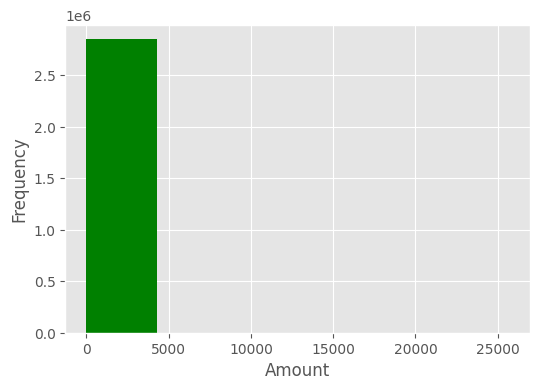

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [5]:
# we provide our solution here
plt.figure(figsize=(6, 4))
plt.hist(big_df.Amount.values, 6, histtype='bar', facecolor='g')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("Minimum amount value is ", np.min(big_df.Amount.values))
print("Maximum amount value is ", np.max(big_df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(big_df.Amount.values, 90))

Data Processing 
data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [6]:
# standardize features by removing the mean and scaling to unit variance
big_df.iloc[:, 1:30] = StandardScaler().fit_transform(big_df.iloc[:, 1:30])
data_matrix = big_df.values
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


In [8]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [19]:
# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
yhat = sklearn_dt.predict(X_test)

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, yhat)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

[Scikit-Learn] ROC-AUC score : 0.938
DecisionTrees's Accuracy:  0.9657428831922437


In [13]:
sklearn_pred[0:10]



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])